<a href="https://colab.research.google.com/github/adityadhumal06/Covolutional_Neural_Network/blob/main/cifar10_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten

In [2]:
from keras.datasets import cifar10

In [3]:
# Load Dataset

In [4]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
xtrain.shape

(50000, 32, 32, 3)

In [6]:
xtest.shape

(10000, 32, 32, 3)

In [7]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

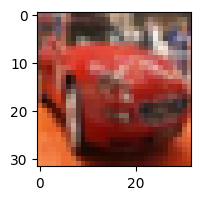

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,2))
plt.imshow(xtrain[5])

In [9]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
ytrain = ytrain.reshape(-1)

In [11]:
ytrain[:5] # 2d to 1d

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
# Normalize the data
xtrain = xtrain/255
xtest = xtest/255

In [13]:
xtrain[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
# Model Building and training

In [15]:
from tensorflow.keras.models import Sequential
model = Sequential()

model.add(Flatten(input_shape=(32,32,3)))

model.add(Dense(3000,activation='relu'))
model.add(Dense(1000,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Build ANN
history = model.fit(xtrain,ytrain,epochs=6,validation_data=(xtest,ytest))

Epoch 1/6
1563/1563 [==============================] - 14s 5ms/step - loss: 1.8906 - accuracy: 0.3284 - val_loss: 1.7351 - val_accuracy: 0.3775
Epoch 2/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6577 - accuracy: 0.4074 - val_loss: 1.6282 - val_accuracy: 0.4173
Epoch 3/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5851 - accuracy: 0.4306 - val_loss: 1.5514 - val_accuracy: 0.4499
Epoch 4/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5368 - accuracy: 0.4489 - val_loss: 1.5580 - val_accuracy: 0.4465
Epoch 5/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5074 - accuracy: 0.4594 - val_loss: 1.5753 - val_accuracy: 0.4504
Epoch 6/6
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4721 - accuracy: 0.4749 - val_loss: 1.4824 - val_accuracy: 0.4794


In [19]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 1.4824 - accuracy: 0.4794


[1.4824497699737549, 0.47940000891685486]

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(xtest)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[5.0569102e-02, 2.2979176e-02, 9.4345279e-02, ..., 9.2636794e-03,
        2.8994942e-02, 1.0187504e-02],
       [4.6513960e-02, 2.9244167e-01, 1.1200112e-03, ..., 3.1577484e-04,
        2.4920939e-01, 4.0945581e-01],
       [1.3250521e-01, 1.9020323e-01, 2.5010591e-03, ..., 3.5889125e-03,
        4.4906271e-01, 2.1599998e-01],
       ...,
       [2.1400629e-03, 1.4872743e-03, 8.9475594e-02, ..., 3.6981933e-02,
        4.0171880e-02, 7.1563493e-03],
       [1.5961258e-02, 6.4820605e-03, 1.8129979e-01, ..., 8.1986725e-02,
        2.2390403e-03, 8.3800396e-03],
       [1.7514069e-02, 2.1937785e-03, 6.8672359e-02, ..., 7.1782464e-01,
        2.6811226e-03, 4.7743679e-03]], dtype=float32)

In [57]:
ypred_classes = [np.argmax(element) for element in y_pred]
# ypred_classes

In [23]:
print('classification report: |n',classification_report(ytest,ypred_classes))

classification report: |n               precision    recall  f1-score   support

           0       0.53      0.54      0.54      1000
           1       0.63      0.57      0.60      1000
           2       0.37      0.31      0.34      1000
           3       0.37      0.22      0.28      1000
           4       0.38      0.44      0.41      1000
           5       0.39      0.41      0.40      1000
           6       0.47      0.58      0.52      1000
           7       0.47      0.58      0.52      1000
           8       0.61      0.62      0.61      1000
           9       0.56      0.54      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



In [52]:
from warnings import filters
# Improve accuracy using CNN
from tensorflow.keras.layers import BatchNormalization,Dropout

cnn = Sequential()
# Convolutional Layer
cnn.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(32,32,3)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn.add(Flatten()) # Flatten Layer

# Dense Layer
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(Dense(256,activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(Dense(10,activation='softmax'))

In [53]:
cnn.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
history = cnn.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
1563/1563 [==============================] - 14s 6ms/step - loss: 1.3987 - accuracy: 0.5011 - val_loss: 1.3255 - val_accuracy: 0.5357
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0366 - accuracy: 0.6376 - val_loss: 1.2558 - val_accuracy: 0.5696
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8670 - accuracy: 0.6956 - val_loss: 0.9664 - val_accuracy: 0.6621
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7570 - accuracy: 0.7369 - val_loss: 1.0107 - val_accuracy: 0.6544
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6551 - accuracy: 0.7704 - val_loss: 1.2686 - val_accuracy: 0.5895
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5712 - accuracy: 0.7980 - val_loss: 1.1338 - val_accuracy: 0.6603
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5030 - accuracy: 0.8234 - val_loss: 1.0130 - val_accurac

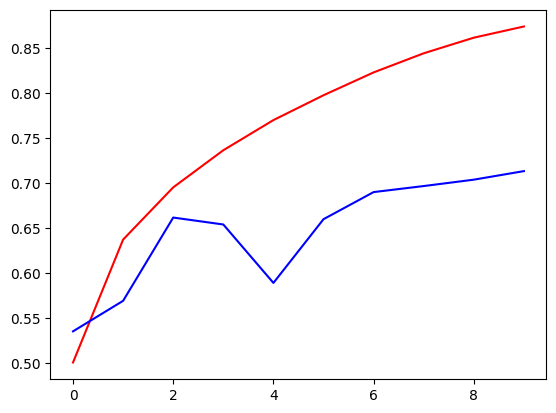

In [55]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')

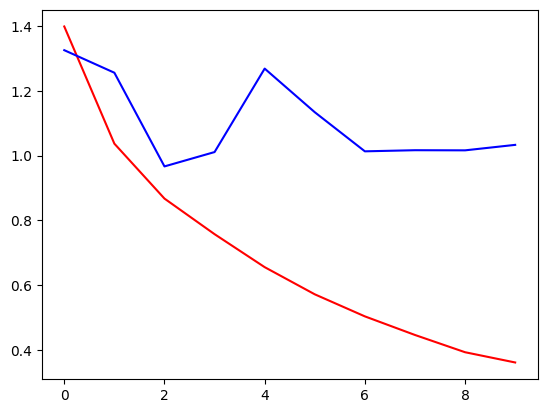

In [56]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')

In [58]:
cnn.evaluate(xtest,ytest)

313/313 [==============================] - 2s 5ms/step - loss: 1.0329 - accuracy: 0.7137


[1.0329160690307617, 0.713699996471405]

In [62]:
ytest_reshape = ytest.reshape(-1)

In [63]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [66]:
ypred = cnn.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [67]:
ypred[:5]

array([[1.08707068e-03, 1.21720438e-03, 1.69807915e-02, 3.79389495e-01,
        1.23129385e-02, 4.27653372e-01, 1.15113437e-01, 3.71665508e-02,
        4.86161327e-04, 8.59290361e-03],
       [3.65632446e-03, 1.04043782e-01, 4.50825652e-08, 1.25198829e-08,
        2.05763549e-11, 2.59980704e-10, 1.37141443e-09, 5.44495074e-11,
        8.92124772e-01, 1.75090987e-04],
       [4.40743901e-02, 1.65969804e-02, 1.52441426e-05, 1.39628813e-04,
        1.33626281e-06, 3.43104944e-06, 1.91307163e-06, 9.15707642e-06,
        9.34672356e-01, 4.48549027e-03],
       [9.99361813e-01, 1.17024116e-04, 2.00108349e-04, 8.31146338e-07,
        7.80105984e-06, 8.50032720e-08, 4.18019219e-08, 3.55174257e-06,
        1.99796574e-04, 1.09045708e-04],
       [8.18218715e-10, 2.49715804e-11, 9.21511208e-04, 6.38806028e-04,
        9.93439019e-01, 7.83430460e-06, 4.99287713e-03, 1.46872265e-08,
        1.65319328e-10, 4.95948338e-10]], dtype=float32)

In [73]:
y_classes = [np.argmax(element)  for element in ypred]
y_classes[:5]

[5, 8, 8, 0, 4]

In [75]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [76]:
print('classification report: \n',classification_report(ytest,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      1000
           1       0.86      0.78      0.81      1000
           2       0.67      0.60      0.63      1000
           3       0.52      0.52      0.52      1000
           4       0.68      0.68      0.68      1000
           5       0.63      0.59      0.61      1000
           6       0.81      0.78      0.79      1000
           7       0.73      0.78      0.76      1000
           8       0.86      0.78      0.82      1000
           9       0.69      0.86      0.76      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

